<a href="https://colab.research.google.com/github/Dohun-Im/Machine_Learning/blob/master/lol_data_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('./diarank10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


# 컬럼들 간의 상관관계 분석

In [ ]:
re_p = df.corr(method='pearson')
re_p['blueWins'][1:]

blueWins                        1.000000
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueFirstBlood                  0.201769
blueKills                       0.337358
blueDeaths                     -0.339297
blueAssists                     0.276685
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalGold                   0.417213
blueAvgLevel                    0.357820
blueTotalExperience             0.396141
blueTotalMinionsKilled          0.224909
blueTotalJungleMinionsKilled    0.131445
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueCSPerMin                    0.224909
blueGoldPerMin                  0.417213
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redFirstBlood                  -0.201769
redKills                       -0.339297
redDeaths       

In [ ]:
re_p1 = re_p[re_p['blueWins']>=0.2]
re_p1['blueWins']

blueWins                  1.000000
blueFirstBlood            0.201769
blueKills                 0.337358
blueAssists               0.276685
blueEliteMonsters         0.221944
blueDragons               0.213768
blueTotalGold             0.417213
blueAvgLevel              0.357820
blueTotalExperience       0.396141
blueTotalMinionsKilled    0.224909
blueGoldDiff              0.511119
blueExperienceDiff        0.489558
blueCSPerMin              0.224909
blueGoldPerMin            0.417213
redDeaths                 0.337358
Name: blueWins, dtype: float64

# 상관관계가 0.2 넘는것들

In [ ]:
# blueFirstBlood, blueKills, blueDeaths, blueAssists,
# blueEliteMonsters, blueDragons, blueTotalGold, blueAvgLevel,
# blueTotalExperience, blueTotalMinionsKilled, blueGoldDiff, blueExperienceDiff, 
# blueCSPerMin, blueGoldPerMin

# 상관관계 0.4 넘는것들

In [ ]:
# bluewin = pd.DataFrame(columns=['blueTotalGold','blueGoldDiff','blueExperienceDiff','blueGoldPerMin'])

# 우리가 쓸 features

In [ ]:
# blueFirstBlood, blueKills, blueDeaths, blueAssists, blueDragons, blueGoldDiff, 
# blueExperienceDiff, blueTotalMinionsKilled


In [ ]:
# 킬, 어시스트, 드래곤, 전령, 골드 (차이)
# ['WardsPlacedDiff', 'WardsDestroyedDiff', 'KillDiff','FirstBlood' ,'AssistDiff', 'GoldDiff', 'DragonDiff', 'HeraldDiff']
# ExperienceDiff, TowersDestroyed
# 'FirstTower', 'ExDiff' , 'MinionDiff'
bluewin = pd.DataFrame(columns=['KillDiff',
                                'FirstBlood' , 'AssistDiff', 'GoldDiff', 'Dragon', 
                                'Herald','ExperienceDiff', 'TowersDestroyed', 'MinionDiff'])

In [ ]:
bluewin['win'] = df['blueWins']
bluewin['KillDiff'] = df['blueKills'] - df['redKills']
bluewin['FirstBlood'] = df['blueFirstBlood']
bluewin['AssistDiff'] = df['blueAssists'] - df['redAssists']
bluewin['GoldDiff'] = df['blueGoldDiff'] / 100
bluewin['Dragon'] = df['blueDragons']
bluewin['Herald'] = df['blueHeralds']
bluewin['ExperienceDiff'] = df['blueExperienceDiff'] / 100
bluewin['TowersDestroyed'] = df['blueTowersDestroyed']
bluewin['MinionDiff'] = df['blueTotalMinionsKilled'] - df['redTotalMinionsKilled']

In [ ]:
bluewin

,KillDiff,FirstBlood,AssistDiff,GoldDiff,Dragon,Herald,ExperienceDiff,TowersDestroyed,MinionDiff,win
0,3,1,3,6.43,0,0,-0.08,0,-2,0
1,0,0,3,-29.08,0,0,-11.73,0,-66,0
2,-4,0,-10,-11.72,1,0,-10.33,0,-17,0
3,-1,0,-5,-13.21,0,1,-0.07,0,-34,0
4,0,0,-1,-10.04,0,0,2.30,0,-15,0
...,...,...,...,...,...,...,...,...,...,...
9874,3,1,-2,25.19,1,0,24.69,0,-18,1
9875,2,0,5,7.82,1,0,8.88,0,27,1
9876,-1,0,-6,-24.16,0,0,-18.77,0,-51,0
9877,-1,1,2,-8.39,1,0,-10.85,0,-23,0


In [ ]:
# 데이터 확인
des = bluewin.describe(percentiles=[.01,.05,.25, .75,.95,.99])
des.transpose()

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
KillDiff,9879.0,0.046260,4.195489,-17.00,-10.0000,-7.000,-3.000,0.00,3.00,7.000,10.0000,16.00
FirstBlood,9879.0,0.504808,0.500002,0.00,0.0000,0.000,0.000,1.00,1.00,1.000,1.0000,1.00
AssistDiff,9879.0,-0.017006,5.766787,-25.00,-14.0000,-10.000,-4.000,0.00,4.00,9.000,14.0000,23.00
GoldDiff,9879.0,0.144141,24.533492,-108.30,-57.3610,-40.332,-15.855,0.14,15.96,40.740,58.7486,114.67
Dragon,9879.0,0.361980,0.480597,0.00,0.0000,0.000,0.000,0.00,1.00,1.000,1.0000,1.00
Herald,9879.0,0.187974,0.390712,0.00,0.0000,0.000,0.000,0.00,0.00,1.000,1.0000,1.00
ExperienceDiff,9879.0,-0.336203,19.203704,-93.33,-45.8528,-32.061,-12.905,-0.28,12.12,31.093,46.4810,83.48
TowersDestroyed,9879.0,0.051422,0.244369,0.00,0.0000,0.000,0.000,0.00,0.00,0.000,1.0000,4.00
MinionDiff,9879.0,-0.649661,30.942675,-120.00,-73.0000,-52.000,-21.000,-1.00,20.00,50.000,73.0000,127.00
win,9879.0,0.499038,0.500024,0.00,0.0000,0.000,0.000,0.00,1.00,1.000,1.0000,1.00


<AxesSubplot:ylabel='KillDiff'>

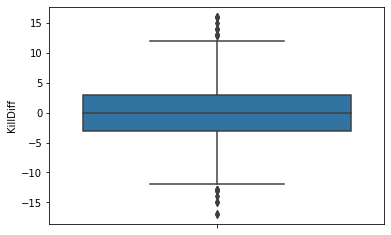

In [ ]:
sns.boxplot(y=bluewin['KillDiff'])

<AxesSubplot:ylabel='AssistDiff'>

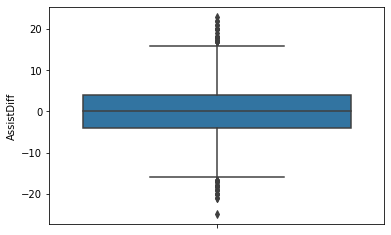

In [ ]:
sns.boxplot(y=bluewin['AssistDiff'])

<AxesSubplot:ylabel='GoldDiff'>

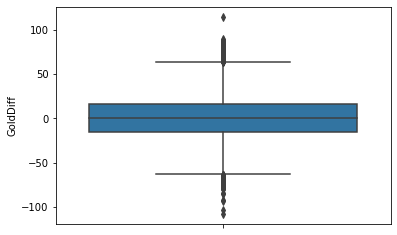

In [ ]:
sns.boxplot(y=bluewin['GoldDiff'])

<AxesSubplot:ylabel='ExperienceDiff'>

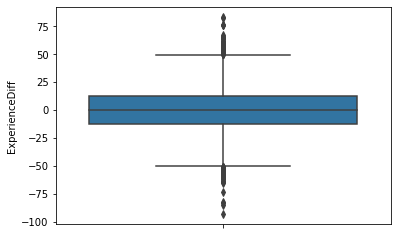

In [ ]:
sns.boxplot(y=bluewin['ExperienceDiff'])

<AxesSubplot:ylabel='MinionDiff'>

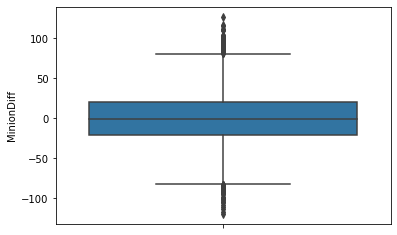

In [ ]:
sns.boxplot(y=bluewin['MinionDiff'])

In [ ]:
#상하위1퍼

In [ ]:
bluewin = bluewin[bluewin['KillDiff']<10]
bluewin = bluewin[bluewin['KillDiff']>-10]
bluewin = bluewin[bluewin['AssistDiff']<14]
bluewin = bluewin[bluewin['AssistDiff']>-14]
bluewin = bluewin[bluewin['GoldDiff']<58.75]
bluewin = bluewin[bluewin['GoldDiff']>-57.361]
bluewin = bluewin[bluewin['ExperienceDiff']<46.481]
bluewin = bluewin[bluewin['ExperienceDiff']>-45.8528]
bluewin = bluewin[bluewin['MinionDiff']<73]
bluewin = bluewin[bluewin['MinionDiff']>-73]
bluewin



,KillDiff,FirstBlood,AssistDiff,GoldDiff,Dragon,Herald,ExperienceDiff,TowersDestroyed,MinionDiff,win
0,3,1,3,6.43,0,0,-0.08,0,-2,0
1,0,0,3,-29.08,0,0,-11.73,0,-66,0
2,-4,0,-10,-11.72,1,0,-10.33,0,-17,0
3,-1,0,-5,-13.21,0,1,-0.07,0,-34,0
4,0,0,-1,-10.04,0,0,2.30,0,-15,0
...,...,...,...,...,...,...,...,...,...,...
9874,3,1,-2,25.19,1,0,24.69,0,-18,1
9875,2,0,5,7.82,1,0,8.88,0,27,1
9876,-1,0,-6,-24.16,0,0,-18.77,0,-51,0
9877,-1,1,2,-8.39,1,0,-10.85,0,-23,0


In [ ]:
#상하위 5퍼
# bluewin = bluewin[bluewin['KillDiff']<7]
# bluewin = bluewin[bluewin['KillDiff']>-7]
# bluewin = bluewin[bluewin['AssistDiff']<9]
# bluewin = bluewin[bluewin['AssistDiff']>-10]
# bluewin = bluewin[bluewin['GoldDiff']<40.74]
# bluewin = bluewin[bluewin['GoldDiff']>-40.332]
# bluewin = bluewin[bluewin['ExperienceDiff']<31.093]
# bluewin = bluewin[bluewin['ExperienceDiff']>-432.061]
# bluewin = bluewin[bluewin['MinionDiff']<50]
# bluewin = bluewin[bluewin['MinionDiff']>-52]
# bluewin


In [ ]:
bluewin.to_csv('./bluewin22.csv')

Text(0.5, 1.0, 'blueGoldDiff - blueCSPerMin')

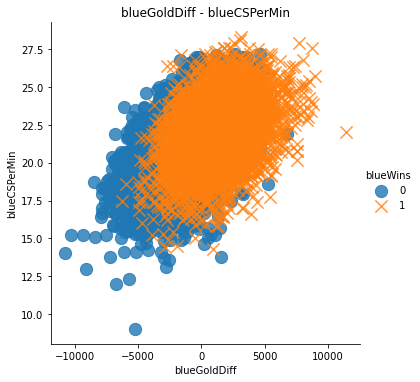

In [ ]:
sns.lmplot('blueGoldDiff','blueCSPerMin', data=df, fit_reg= False,
          scatter_kws={"s":150},
          markers=['o','x'],
          hue='blueWins')

plt.title('blueGoldDiff - blueCSPerMin')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_data = bluewin.loc[:, 'KillDiff':'MinionDiff'] # 문제데이터
y_data = bluewin.loc[:, 'win'] # 정답데이터

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, # 문제 데이터
    y_data, # 답 데이터
    test_size =0.2, # 비율
    shuffle = True, # 셔플링 여부
    random_state = 20 # 시드값
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn = KNeighborsClassifier()
svc_linear= SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')

In [ ]:
clf_list = [dt_clf, rf_clf, lr_clf, knn, svc_linear,svc_rbf]

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def callKFold_all(clf_list):
    for clf in clf_list:
        scores = cross_val_score(clf, x_train, y_train, cv=5)
        for iter_count, accuracy in enumerate(scores):
            print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

        print("평균 정확도: {0:.4f}".format(np.mean(scores)))

In [ ]:
first_result = callKFold_all(clf_list)
first_result

교차 검증 0 정확도: 0.6091
교차 검증 1 정확도: 0.6152
교차 검증 2 정확도: 0.6077
교차 검증 3 정확도: 0.6138
교차 검증 4 정확도: 0.6111
평균 정확도: 0.6114
교차 검증 0 정확도: 0.6931
교차 검증 1 정확도: 0.6938
교차 검증 2 정확도: 0.6992
교차 검증 3 정확도: 0.6911
교차 검증 4 정확도: 0.6999
평균 정확도: 0.6954
교차 검증 0 정확도: 0.7127
교차 검증 1 정확도: 0.7243
교차 검증 2 정확도: 0.7053
교차 검증 3 정확도: 0.7073
교차 검증 4 정확도: 0.7229
평균 정확도: 0.7145
교차 검증 0 정확도: 0.6518
교차 검증 1 정확도: 0.6504
교차 검증 2 정확도: 0.6667
교차 검증 3 정확도: 0.6606
교차 검증 4 정확도: 0.6619
평균 정확도: 0.6583
교차 검증 0 정확도: 0.6877
교차 검증 1 정확도: 0.6768
교차 검증 2 정확도: 0.6856
교차 검증 3 정확도: 0.6883
교차 검증 4 정확도: 0.6890
평균 정확도: 0.6855
교차 검증 0 정확도: 0.7114
교차 검증 1 정확도: 0.7270
교차 검증 2 정확도: 0.7053
교차 검증 3 정확도: 0.7046
교차 검증 4 정확도: 0.7236
평균 정확도: 0.7144
교차 검증 0 정확도: 0.7087
교차 검증 1 정확도: 0.7019
교차 검증 2 정확도: 0.7026
교차 검증 3 정확도: 0.7033
교차 검증 4 정확도: 0.7188
평균 정확도: 0.7070


In [ ]:
from sklearn.model_selection import GridSearchCV

# LR 모델

In [ ]:
params = {"C":[0.001,0.01,0.1,0.5, 1,3,5,7,9]} # 규제 강도 설정
grid_dclf = GridSearchCV( lr_clf, param_grid=params, cv = 4, scoring='accuracy', verbose=1)
grid_dclf.fit(x_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7, 9]},
             scoring='accuracy', verbose=1)

In [ ]:
best_dclf = grid_dclf.best_estimator_
best_dclf

LogisticRegression(C=0.01)

In [ ]:
pred = best_dclf.predict(x_test)
pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.7361863488624052

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       916
           1       0.73      0.75      0.74       930

    accuracy                           0.74      1846
   macro avg       0.74      0.74      0.74      1846
weighted avg       0.74      0.74      0.74      1846



# svc_rbf

In [ ]:
params = {'kernel': ['rbf'],'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
            'C': [0.01, 0.1, 1, 10, 100, 1000]} # 규제 강도 설정
grid_dclf = GridSearchCV( svc_rbf, param_grid=params, cv = 4, scoring='accuracy', verbose=1)
grid_dclf.fit(x_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


In [ ]:
best_dclf = grid_dclf.best_estimator_
pred = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       916
           1       0.73      0.74      0.74       930

    accuracy                           0.73      1846
   macro avg       0.73      0.73      0.73      1846
weighted avg       0.73      0.73      0.73      1846



In [ ]:
clf_list = [dt_clf, rf_clf, lr_clf, knn, svc_linear,svc_rbf]

# KNN 

In [ ]:
params = {'n_neighbors' : list(range(1,20))} # 규제 강도 설정
grid_dclf = GridSearchCV( knn, param_grid=params, cv = 4, scoring='accuracy', verbose=1)
grid_dclf.fit(x_train, y_train)

Fitting 4 folds for each of 19 candidates, totalling 76 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=1)

In [ ]:
best_dclf = grid_dclf.best_estimator_
pred = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       916
           1       0.72      0.72      0.72       930

    accuracy                           0.71      1846
   macro avg       0.71      0.71      0.71      1846
weighted avg       0.71      0.71      0.71      1846



# RF 모델

In [ ]:
params = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]} # 규제 강도 설정
grid_dclf = GridSearchCV(rf_clf, param_grid=params, cv = 4, scoring='accuracy', verbose=1)
grid_dclf.fit(x_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy', verbose=1)

In [ ]:
best_dclf = grid_dclf.best_estimator_
pred = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(best_dclf)
print(pred)
print(accuracy)
print(classification_report(y_test, pred))

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=11)
[1 1 0 ... 1 1 0]
0.7269772481040087
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       916
           1       0.73      0.73      0.73       930

    accuracy                           0.73      1846
   macro avg       0.73      0.73      0.73      1846
weighted avg       0.73      0.73      0.73      1846



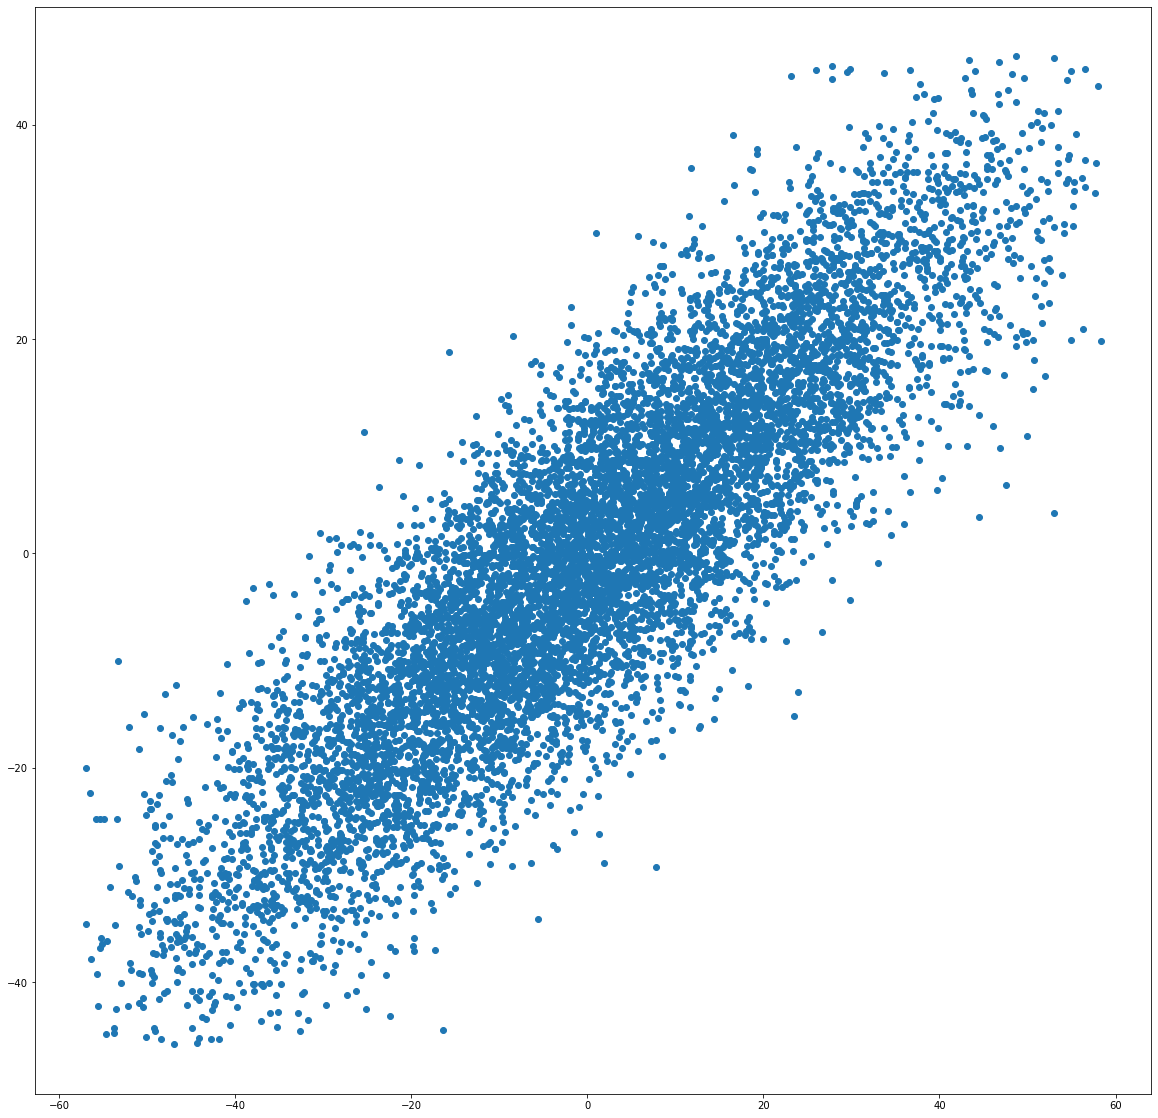

In [ ]:
plt.figure(figsize=(20, 20))
plt.scatter(bluewin['GoldDiff'], bluewin['ExperienceDiff'])
plt.xlabel='Gold Difference'
plt.ylabel='Experience Difference'
plt.show()

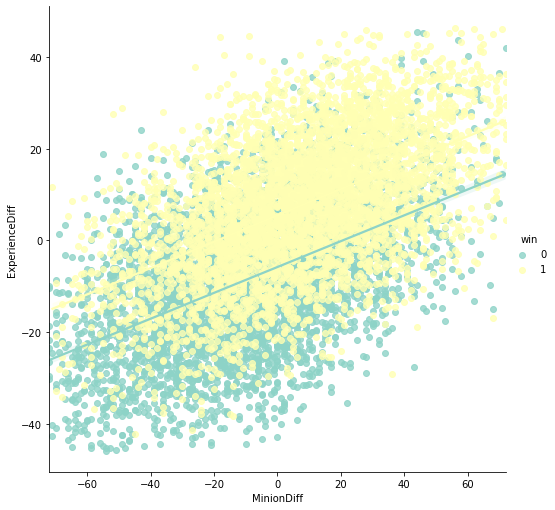

In [ ]:
sns.lmplot(x='MinionDiff', y='ExperienceDiff', hue = 'win', 
           data=bluewin, palette='Set3', size=7)

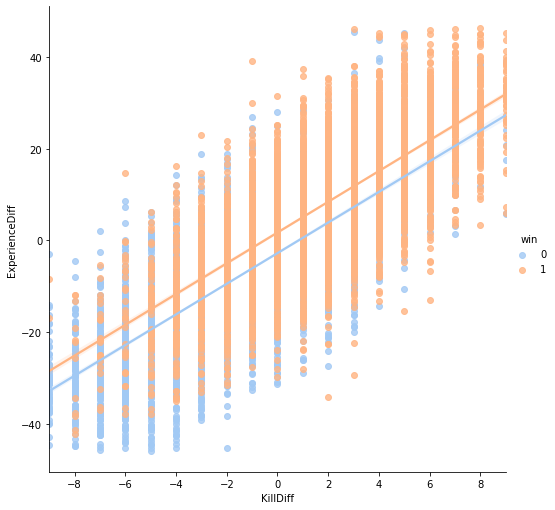

In [ ]:
sns.lmplot(x='KillDiff', y='ExperienceDiff', hue = 'win', 
           data=bluewin, palette='pastel', size=7)

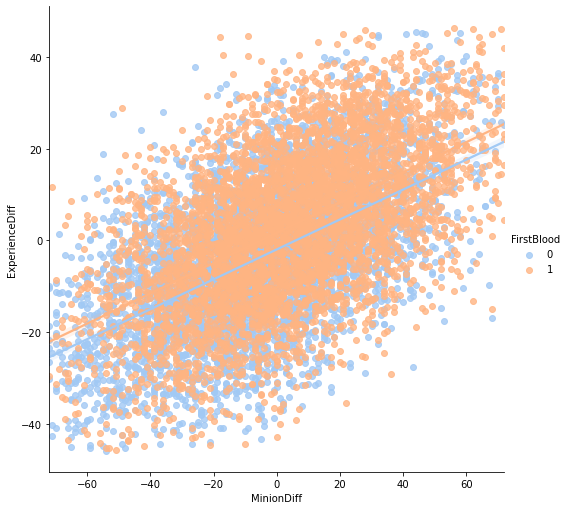

In [ ]:
sns.lmplot(x='MinionDiff', y='ExperienceDiff', hue = 'FirstBlood', 
           data=bluewin, palette='pastel', size=7)

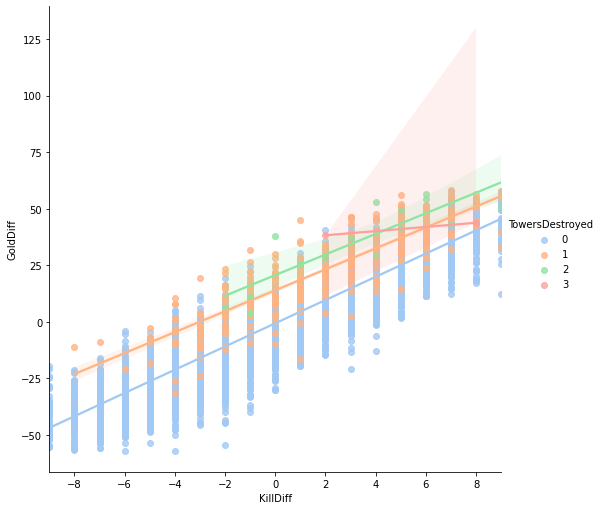

In [ ]:
sns.lmplot(x='KillDiff', y='GoldDiff', hue = 'TowersDestroyed', 
           data=bluewin, palette='pastel', size=7)

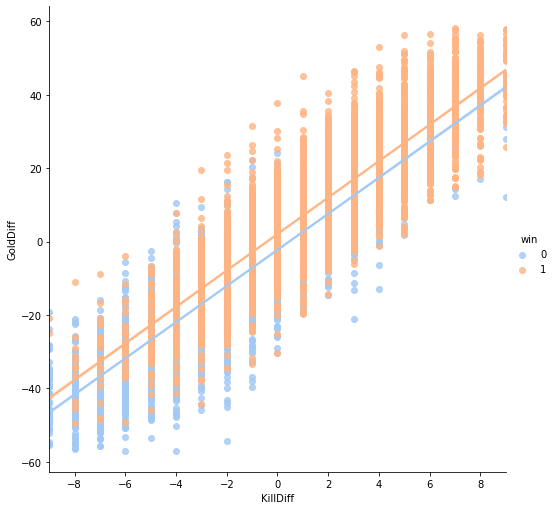

In [ ]:
sns.lmplot(x='KillDiff', y='GoldDiff', hue = 'win', 
           data=bluewin, palette='pastel', size=7)